<a href="https://colab.research.google.com/github/Shrey42-dot/Flood-Prediction-ML-model/blob/main/project_1_flood_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Flood Prediction using Machine Learning

##  Introduction
Floods are one of the most destructive natural disasters, and predicting them accurately is vital for disaster management.

**Dataset Source:** Kaggle Flood Dataset  

**Project Steps:**
1. Load and explore dataset.
2. Perform **EDA (Exploratory Data Analysis)**.
3. Apply **Feature Engineering**.
4. Train baseline models (**Random Forest, XGBoost**).
5. Perform **Hyperparameter Tuning**.
6. Evaluate & visualize results.
7. Draw **conclusions & future improvements**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flood.csv")

In [ ]:
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [ ]:
df.shape

(50000, 21)

In [ ]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df.head(20)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
5,6,6,6,4,6,4,3,1,3,5,...,10,5,9,5,5,7,3,3,2,0.470
6,6,7,4,5,5,5,4,8,8,4,...,8,4,5,4,7,7,5,4,8,0.570
7,7,3,5,5,6,6,6,7,6,5,...,4,6,9,7,10,6,5,4,5,0.585
8,6,3,5,4,5,11,3,2,9,7,...,2,8,7,5,4,9,6,5,7,0.580
9,4,3,5,6,2,3,7,7,10,4,...,7,6,5,6,7,5,7,4,8,0.555


###Exploratory Data Analysis (EDA)
###1. Missing Values
###2. Target Variable Distribution
###3. Feature Coorelation Relation
###4. Pairwise Relationships

In [ ]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


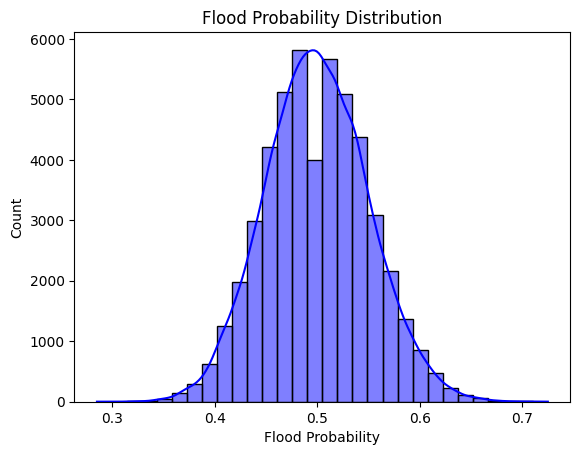

In [ ]:
sns.histplot(df["FloodProbability"], kde=True, bins=30, color="blue")
plt.title("Flood Probability Distribution")
plt.xlabel("Flood Probability")
plt.show()

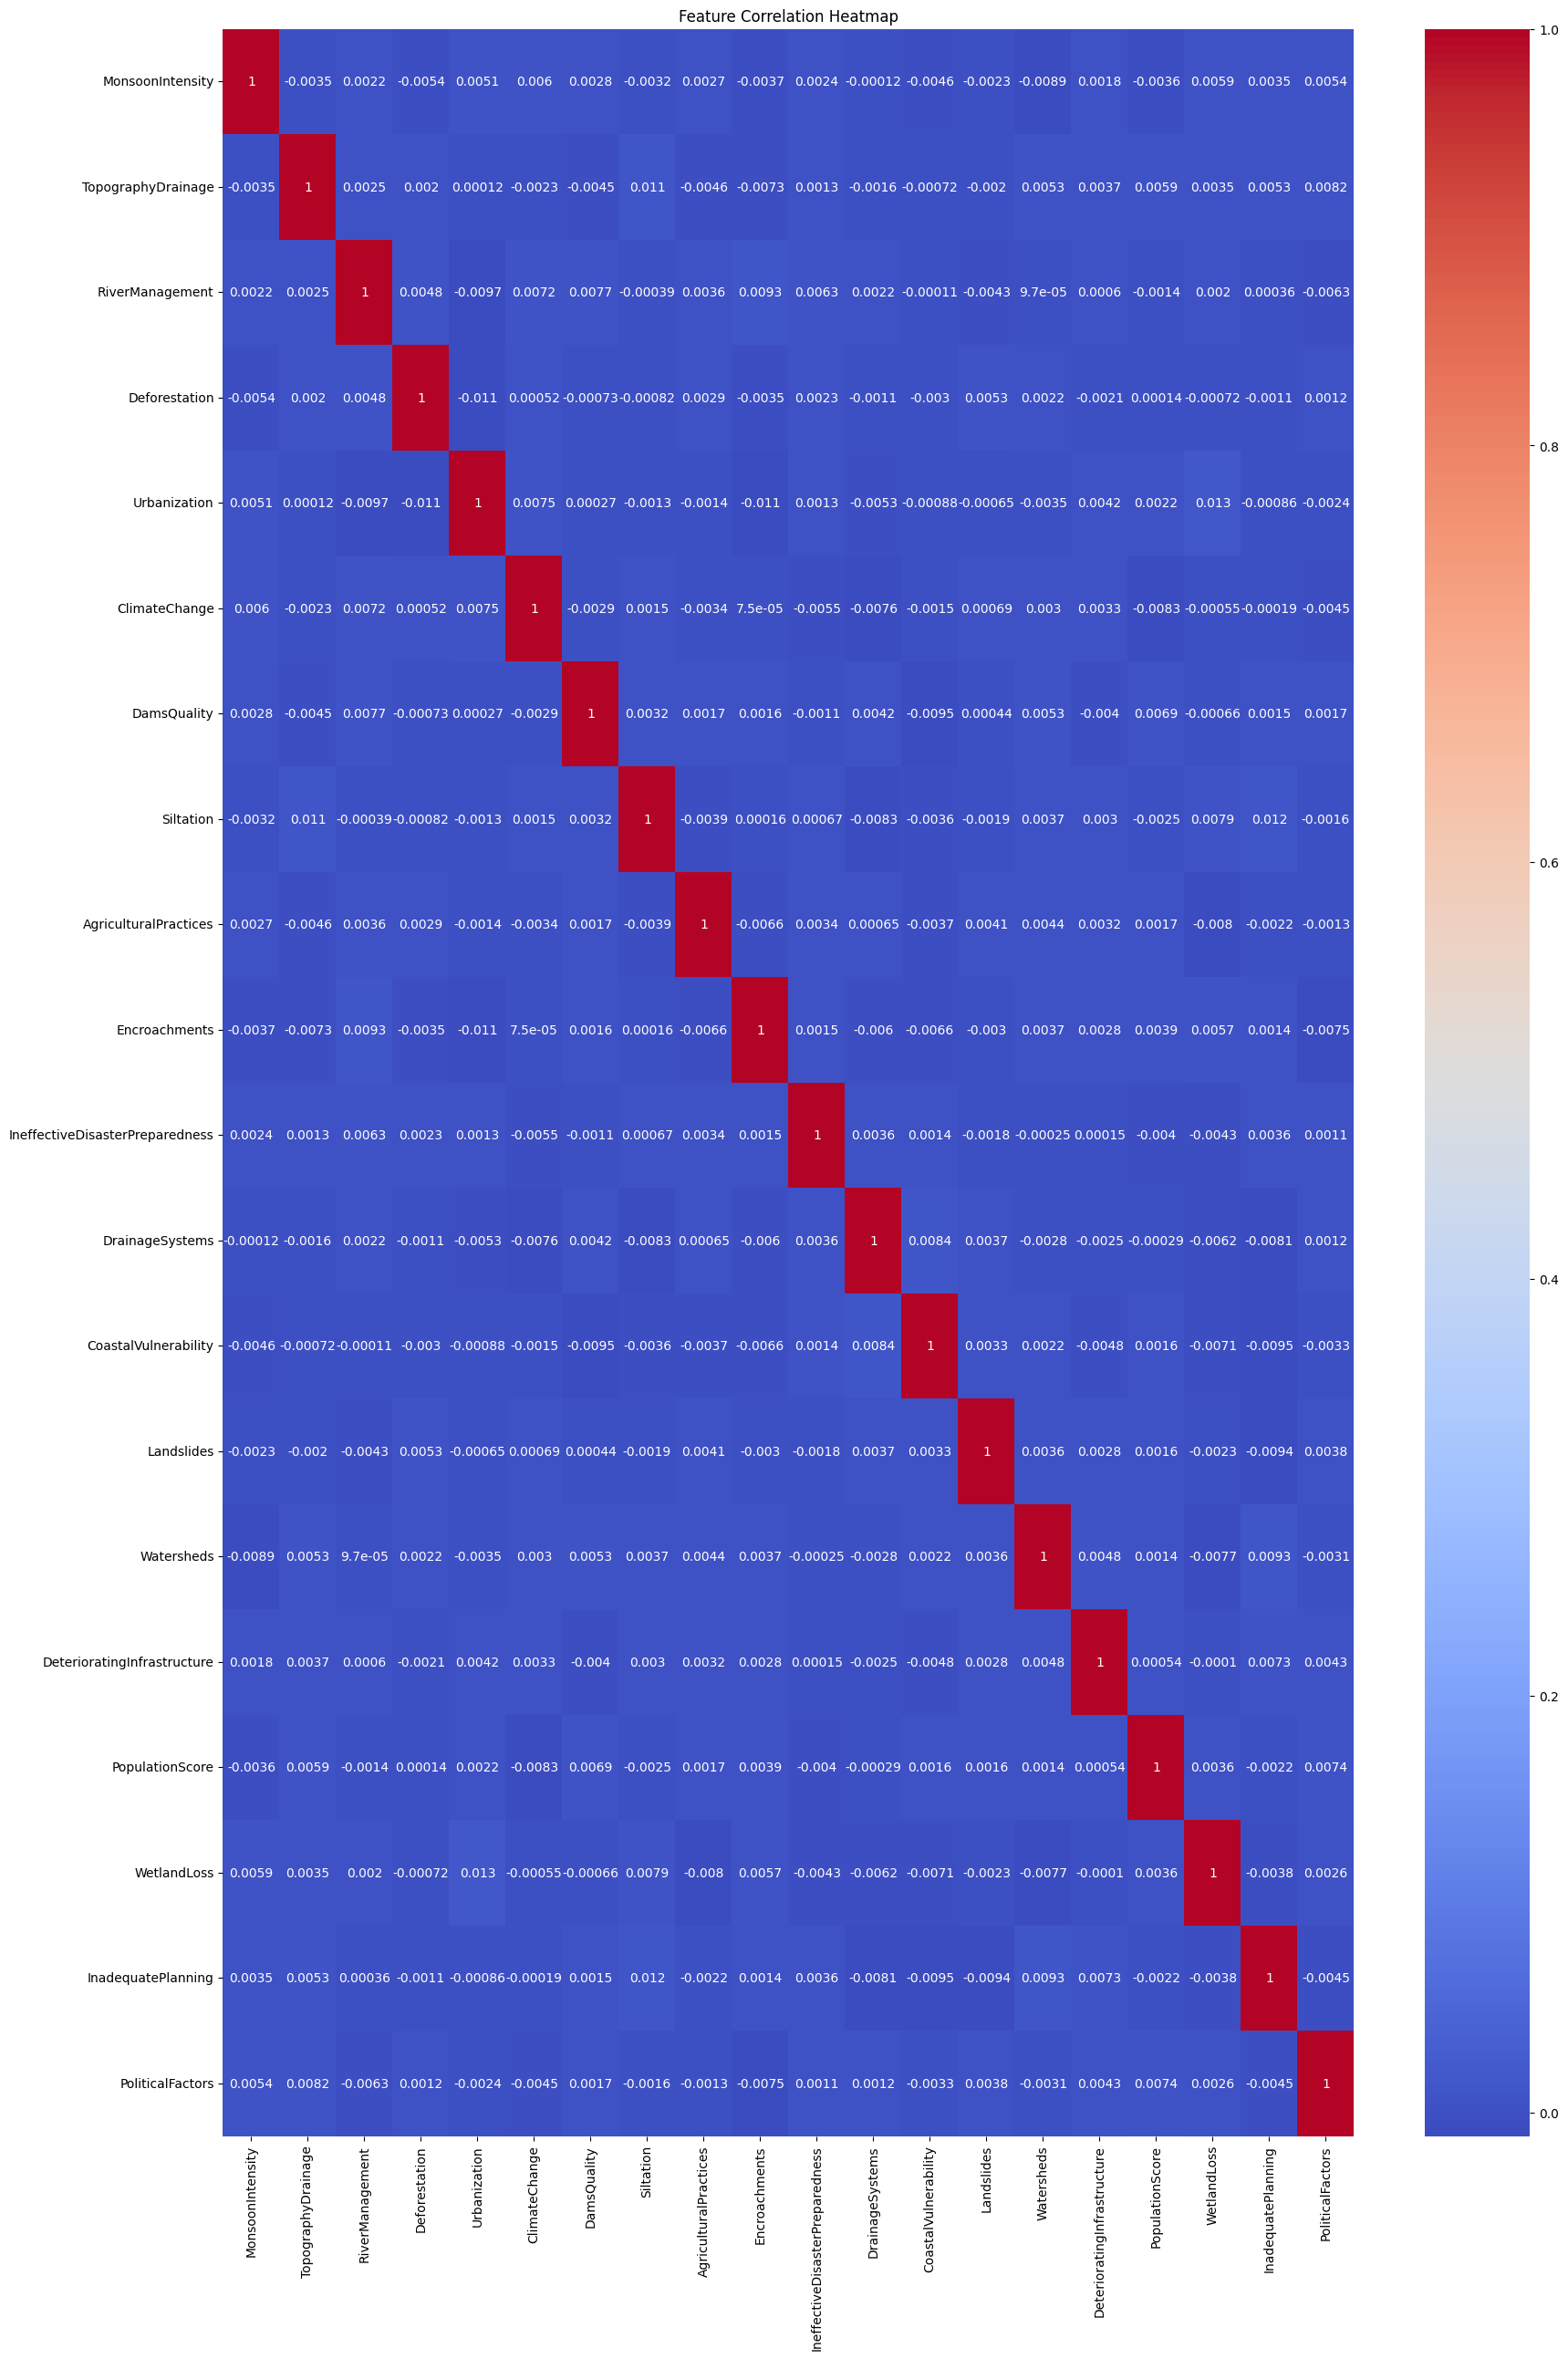

In [ ]:
plt.figure(figsize=(20,30))
sns.heatmap(x.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

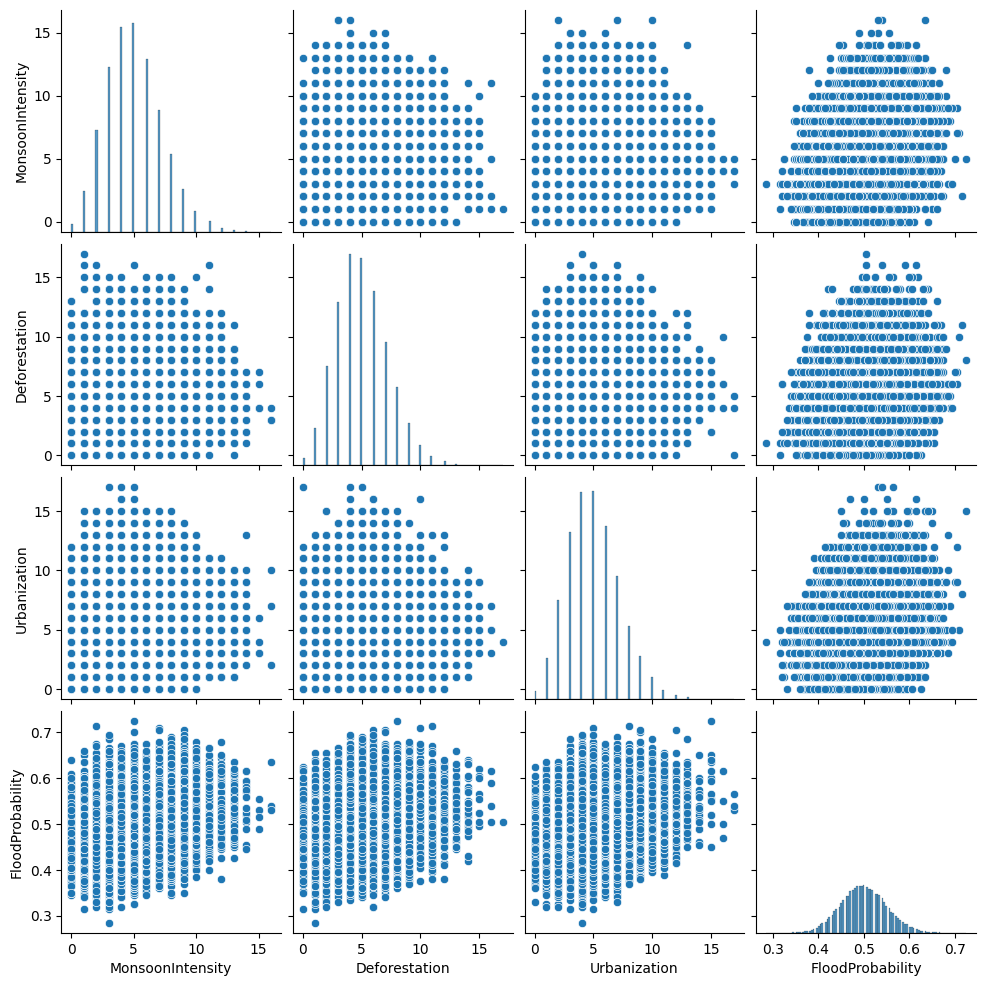

In [ ]:
sns.pairplot(df[["MonsoonIntensity","Deforestation","Urbanization","FloodProbability"]])
plt.show()

###Feature Engineering
Created new interaction features:
- Rainfall × Deforestation
- River Management × Dam Quality
- Urbanization × Inadequate Planning
- Climate Change × Coastal Vulnerability
- Climate Change × Wetland Loss

In [ ]:
df["Rainfall_Deforestation"] = df["MonsoonIntensity"] * df["Deforestation"]
df["River_Dams"] = df["RiverManagement"] * df["DamsQuality"]
df["Urban_Planning"] = df["Urbanization"] * df["InadequatePlanning"]
df["Climate_Coastal"] = df["ClimateChange"] * df["CoastalVulnerability"]
df["Climate_Wetlands"] = df["ClimateChange"] * df["WetlandLoss"]

df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,Rainfall_Deforestation,River_Dams,Urban_Planning,Climate_Coastal,Climate_Wetlands
0,3,8,6,6,4,4,6,2,3,2,...,4,3,2,6,0.450,18,36,8,28,12
1,8,4,5,7,7,9,1,5,5,4,...,1,9,1,3,0.475,56,5,7,18,81
2,3,10,4,1,7,5,4,7,4,9,...,1,8,3,6,0.515,3,16,21,20,40
3,4,4,2,7,3,4,1,4,6,4,...,8,6,6,10,0.520,28,2,18,8,24
4,3,7,5,2,5,8,5,2,7,5,...,4,4,3,4,0.475,6,25,15,48,32


###Train-Test Split + Scaling

In [ ]:
X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Random Forest and XGBoost Models

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

###Model Evaluation

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Random Forest R2:", r2_score(y_test, rf.predict(X_test_scaled)))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

Random Forest R2: 0.7630664024594073
XGBoost R2: 0.9385636739308599


###Hyperparameter Tuning (Random Forest)
##  Hyperparameter Tuning – Random Forest
**RandomizedSearchCV** to find the best parameters.

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_xgb = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.9840210306048119


Visulaisation

Scatter plot: Random Forest

Scatter plot: XGBoost

Hist Plot: Residuals

Horizontal Bar plot: Feature Importance

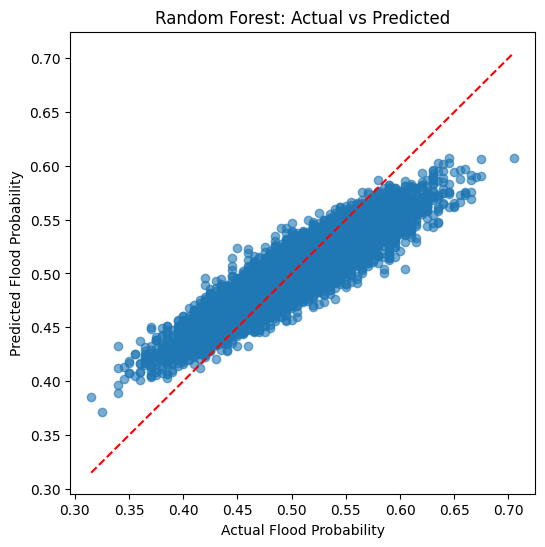

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


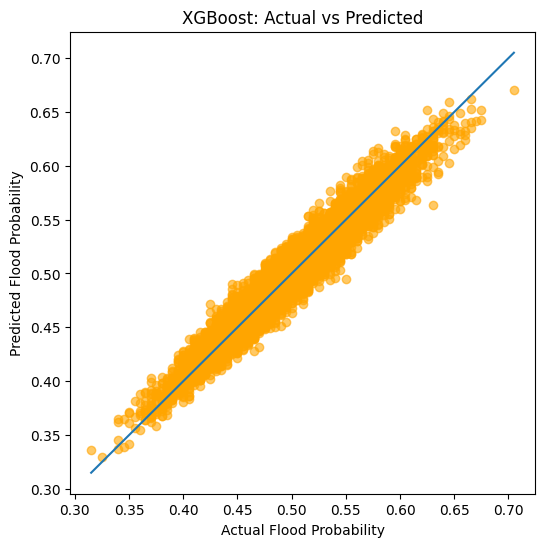

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


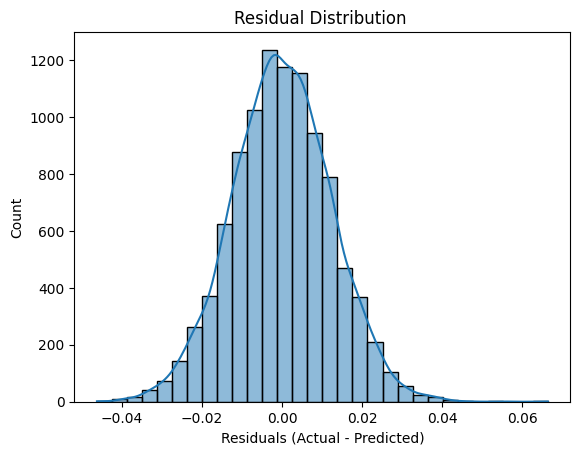

In [ ]:
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution ")
plt.show()

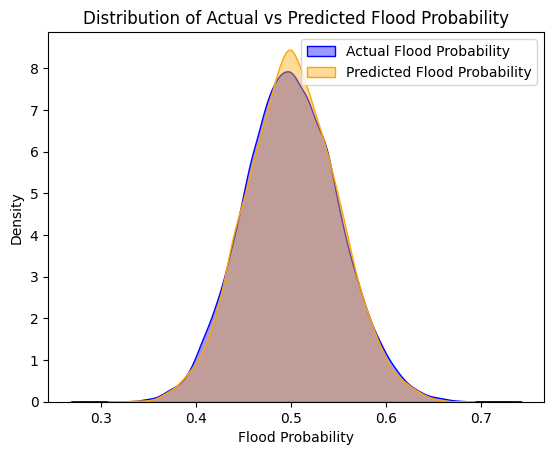

In [ ]:
sns.kdeplot(df['FloodProbability'], label="Actual Flood Probability", fill=True, color="blue", alpha=0.4)
sns.kdeplot(y_pred_xgb, label="Predicted Flood Probability", fill=True, color="orange", alpha=0.4)
plt.title("Distribution of Actual vs Predicted Flood Probability")
plt.xlabel("Flood Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

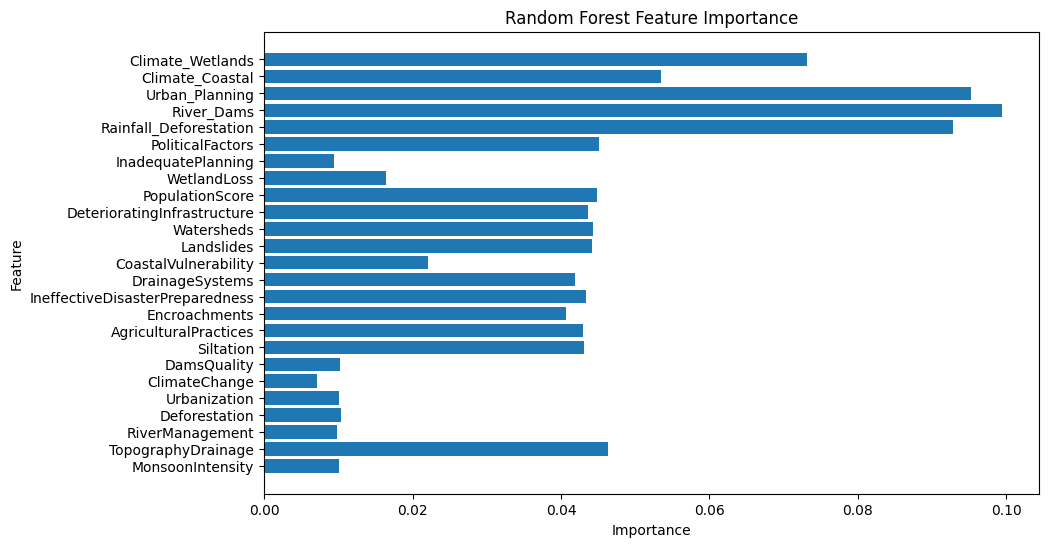

In [ ]:
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

###Cross Validation

In [ ]:
scores = cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean R²:", scores.mean())

Cross-validation scores: [0.98515641 0.98359944 0.98388033 0.98385116 0.98361781]
Mean R²: 0.9840210306048119


#  Conclusion
- **EDA:** Identified correlations & data trends.  
- **Feature Engineering:** Added 5 new interaction features.  
- **Models:** Trained Random Forest & XGBoost.  
- **Tuning:** Hyperparameter tuning improved Random Forest performance.  
- **Visuals:** Compared models & analyzed residuals.  

 This project successfully demonstrates **ML workflow** with:
- Data preprocessing
- Feature engineering
- Baseline models
- Hyperparameter tuning
- Evaluation & visualization  




In [ ]:
custom_input=pd.DataFrame([[
    7,6,5,4,8,7,5,7,6,8,7,8,1,2,6,7,9,6,8,6]],
    columns= [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
    'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
    'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems',
    'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure',
    'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors'
])

In [ ]:
custom_input["Rainfall_Deforestation"] = custom_input["MonsoonIntensity"] * custom_input["Deforestation"]
custom_input["River_Dams"] = custom_input["RiverManagement"] * custom_input["DamsQuality"]
custom_input["Urban_Planning"] = custom_input["Urbanization"] * custom_input["InadequatePlanning"]
custom_input["Climate_Coastal"] = custom_input["ClimateChange"] * custom_input["CoastalVulnerability"]
custom_input["Climate_Wetlands"] = custom_input["ClimateChange"] * custom_input["WetlandLoss"]

custom_input_scaled=scaler.transform(custom_input)

In [ ]:
custom_pred_rf = rf.predict(custom_input_scaled)
custom_pred_xgb = best_xgb.predict(custom_input_scaled)

In [ ]:
print("Random Forest Prediction (Flood Probability):", custom_pred_rf)
print("XGBoost Prediction (Flood Probability):", custom_pred_xgb)

Random Forest Prediction (Flood Probability): [0.5755]
XGBoost Prediction (Flood Probability): [0.60721385]
